<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

In [1]:
# import the packages
import pandas as pd
import numpy as np

# sklearn preprocess
from sklearn.model_selection import train_test_split

# feature engine
import feature_engine.imputation as mdi
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import ReciprocalTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import BoxCoxTransformer
from feature_engine.encoding import CountFrequencyEncoder

# to impute missing data with feature-engine
from feature_engine.imputation import EndTailImputer

# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# to impute missing data with feature-engine
from feature_engine.imputation import ArbitraryNumberImputer

# for discretization
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualWidthDiscretiser

# the scaler - for standardization
from sklearn.preprocessing import StandardScaler

# for linear regression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

# for datetime
from datetime import datetime

### Step 1: Load and Explore the Data

#### Loading the Data

In [2]:
# Load circuit Data
circuits_data = pd.read_csv('./f1db_csv_mod/circuits_mod.csv')
circuits_data.head()

# note: circuitid 15 is Singapore, marina_bay

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [3]:
#circuits_data.info()
#circuits_data.describe()

In [4]:
# load constructor results (cr) data
cr_data = pd.read_csv('./f1db_csv_mod/constructor_results_mod.csv')
cr_data.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [5]:
#cr_data.info()
#cr_data.describe()

In [6]:
# load constructor standing (cs) data
cs_data = pd.read_csv('./f1db_csv_mod/constructor_standings_mod.csv')
cs_data.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [7]:
#cs_data.info()
#cs_data.describe()

In [8]:
# load constructors data
constructors_data = pd.read_csv('./f1db_csv_mod/constructors_mod.csv')
constructors_data.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [9]:
#constructors_data.info()
#constructors_data.describe()

In [10]:
# load driver standings (ds) data
ds_data = pd.read_csv('./f1db_csv_mod/driver_standings_mod.csv')
#ds_data = ds_data.sort_values(by ='points', ascending = False)
#ds_data = ds_data.sort_values(by ='position', ascending = True)
ds_data.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10,1,1,1
1,2,18,2,8,2,2,0
2,3,18,3,6,3,3,0
3,4,18,4,5,4,4,0
4,5,18,5,4,5,5,0


In [11]:
ds_data.shape

(33394, 7)

In [12]:
ds_data.info()
ds_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33394 entries, 0 to 33393
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   driverStandingsId  33394 non-null  int64 
 1   raceId             33394 non-null  int64 
 2   driverId           33394 non-null  int64 
 3   points             33389 non-null  object
 4   position           33394 non-null  int64 
 5   positionText       33394 non-null  object
 6   wins               33394 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


,driverStandingsId,raceId,driverId,position,wins
count,33394.000000,33394.000000,33394.000000,33394.000000,33394.000000
mean,41053.589327,562.539977,298.800114,20.077289,0.265407
std,21717.997691,276.659109,259.756294,16.499785,0.974147
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,19061.250000,342.000000,84.000000,8.000000,0.000000
50%,48903.500000,587.000000,212.000000,16.000000,0.000000
75%,57992.750000,789.000000,484.000000,26.000000,0.000000
max,70780.000000,1074.000000,855.000000,108.000000,13.000000


In [13]:
# load drivers data
drivers_data = pd.read_csv('./f1db_csv_mod/drivers_mod.csv')
drivers_data.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [14]:
drivers_data.shape

(854, 9)

In [15]:
drivers_data.info()
drivers_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     854 non-null    int64 
 1   driverRef    854 non-null    object
 2   number       854 non-null    object
 3   code         854 non-null    object
 4   forename     854 non-null    object
 5   surname      854 non-null    object
 6   dob          854 non-null    object
 7   nationality  854 non-null    object
 8   url          854 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB


,driverId
count,854.000000
mean,427.553864
std,246.761270
min,1.000000
25%,214.250000
50%,427.500000
75%,640.750000
max,855.000000


In [16]:
# load lap times (lt) data
lt_data = pd.read_csv('./f1db_csv_mod/lap_times_mod.csv')
lt_data.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [17]:
#lt_data.info()
#lt_data.describe()

In [18]:
# load pit stops (ps) data
ps_data = pd.read_csv('./f1db_csv_mod/pit_stops_mod.csv')
ps_data.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [19]:
#ps_data.info()
#ps_data.describe()

In [20]:
# load qualifying data
qualifying_data = pd.read_csv('./f1db_csv_mod/qualifying_mod.csv')
qualifying_data.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [21]:
#qualifying_data.info()
#qualifying_data.describe()

In [22]:
# load races data
races_data = pd.read_csv('./f1db_csv_mod/races_mod.csv')
#races_data = races_data.sort_values(by='date', ascending = False)
races_data.head()

# latest is 2012

,raceId,round,circuitId,name,date,time,url
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [23]:
races_data.info()
races_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1080 non-null   int64 
 1   round      1080 non-null   int64 
 2   circuitId  1080 non-null   int64 
 3   name       1080 non-null   object
 4   date       1070 non-null   object
 5   time       1080 non-null   object
 6   url        1080 non-null   object
dtypes: int64(3), object(4)
memory usage: 59.2+ KB


,raceId,round,circuitId
count,1080.000000,1080.000000,1080.000000
mean,542.527778,8.446296,22.450000
std,314.917085,5.050522,17.675305
min,1.000000,1.000000,1.000000
25%,270.750000,4.000000,9.000000
50%,540.500000,8.000000,18.000000
75%,810.250000,12.000000,32.000000
max,1096.000000,23.000000,79.000000


In [24]:
# load results data
results_data = pd.read_csv('./f1db_csv_mod/results_mod.csv')
results_data.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1


In [25]:
results_data.shape

(25399, 18)

In [26]:
results_data.info()
results_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25399 non-null  int64  
 1   raceId           25399 non-null  int64  
 2   driverId         25399 non-null  int64  
 3   constructorId    25399 non-null  int64  
 4   number           25399 non-null  object 
 5   grid             25399 non-null  int64  
 6   position         25399 non-null  object 
 7   positionText     25399 non-null  object 
 8   positionOrder    25399 non-null  int64  
 9   points           25399 non-null  float64
 10  laps             25399 non-null  int64  
 11  time             25399 non-null  object 
 12  milliseconds     25399 non-null  object 
 13  fastestLap       25399 non-null  object 
 14  rank             25399 non-null  object 
 15  fastestLapTime   25399 non-null  object 
 16  fastestLapSpeed  25399 non-null  object 
 17  statusId    

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,25399.000000,25399.000000,25399.000000,25399.000000,25399.000000,25399.000000,25399.000000,25399.000000,25399.000000
mean,12700.761999,521.818576,253.809914,47.809993,11.198000,13.186976,1.822082,45.849443,17.666522
std,7333.289896,292.937855,261.237589,58.784504,7.264033,8.932839,4.075745,29.962512,26.075967
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6350.500000,289.000000,56.000000,6.000000,5.000000,7.000000,0.000000,21.000000,1.000000
50%,12700.000000,506.000000,160.000000,25.000000,11.000000,13.000000,0.000000,52.000000,11.000000
75%,19049.500000,768.000000,353.500000,58.000000,17.000000,19.000000,2.000000,66.000000,14.000000
max,25404.000000,1073.000000,854.000000,214.000000,34.000000,99.000000,50.000000,200.000000,139.000000


In [27]:
# load seasons data
seasons_data = pd.read_csv('./f1db_csv_mod/seasons_mod.csv')
seasons_data.head()

,year,url
0,2009,https://en.wikipedia.org/wiki/2009_Formula_One...
1,2008,https://en.wikipedia.org/wiki/2008_Formula_One...
2,2007,https://en.wikipedia.org/wiki/2007_Formula_One...
3,2006,https://en.wikipedia.org/wiki/2006_Formula_One...
4,2005,https://en.wikipedia.org/wiki/2005_Formula_One...


In [28]:
#seasons_data.info()
#seasons_data.describe()

In [29]:
# load status data
status_mod = pd.read_csv('./f1db_csv_mod/status_mod.csv')
status_mod.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [30]:
status_mod.info()
status_mod.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  137 non-null    int64 
 1   status    137 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


,statusId
count,137.000000
mean,70.226277
std,40.519602
min,1.000000
25%,35.000000
50%,71.000000
75%,105.000000
max,139.000000


#### Exploring the Data

In [31]:
ds_data.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10,1,1,1
1,2,18,2,8,2,2,0
2,3,18,3,6,3,3,0
3,4,18,4,5,4,4,0
4,5,18,5,4,5,5,0


In [32]:
print(ds_data.shape)

(33394, 7)


In [33]:
drivers_data.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [34]:
print(drivers_data.shape)

(854, 9)


In [35]:
results_data.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1


In [36]:
print(results_data.shape)

(25399, 18)


In [37]:
races_data.head()

,raceId,round,circuitId,name,date,time,url
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [38]:
print(races_data.shape)

(1080, 7)


In [39]:
status_mod.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


### Step 2: Data Wrangling on multiple tables 

#### Prediction problem - will Driver Nick Heidfeld finish the race?

In [40]:
# for drivers_data table, subsetting to three columns instead

drivers_data = drivers_data.loc[0:10,['driverId','forename','surname']]
drivers_data

,driverId,forename,surname
0,1,Lewis,Hamilton
1,2,Nick,Heidfeld
2,3,Nico,Rosberg
3,4,Fernando,Alonso
4,5,Heikki,Kovalainen
5,6,Kazuki,Nakajima
6,7,Sébastien,Bourdais
7,8,Kimi,Räikkönen
8,9,Robert,Kubica
9,10,Timo,Glock


In [41]:
# to check what each statusId mean
status_mod

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
132,135,Brake duct
133,136,Seat
134,137,Damage
135,138,Debris


In [42]:
results_data.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1


In [43]:
# from table above, subsetting to these columns instead
results_cols = results_data[['resultId','driverId', 'raceId','points','fastestLapTime', 'statusId']]
#results_cols.tail()
display(results_cols)

,resultId,driverId,raceId,points,fastestLapTime,statusId
0,1,1,18,10.0,01:27.5,1
1,2,2,18,8.0,01:27.7,1
2,3,3,18,6.0,01:28.1,1
3,4,4,18,5.0,01:28.6,1
4,5,5,18,4.0,01:27.4,1
...,...,...,...,...,...,...
25394,25400,815,1073,0.0,01:26.4,5
25395,25401,849,1073,0.0,01:29.3,3
25396,25402,841,1073,0.0,01:29.4,6
25397,25403,847,1073,0.0,01:30.6,6


In [44]:
races_data.head()

,raceId,round,circuitId,name,date,time,url
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [45]:
#races_data.info()

In [46]:
# for races_data, subsetting it to 6 columns instead
race_cols = races_data[['raceId', 'round','circuitId','name','date', 'time']]
#race_cols.tail()
display(race_cols)

,raceId,round,circuitId,name,date,time
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00
...,...,...,...,...,...,...
1075,1092,19,22,Japanese Grand Prix,10/9/2022,5:10:00
1076,1093,20,69,United States Grand Prix,10/23/2022,19:00:00
1077,1094,21,32,Mexico City Grand Prix,10/30/2022,19:00:00
1078,1095,22,18,São Paulo Grand Prix,11/13/2022,17:00:00


In [47]:
circuits_data.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [48]:
# Extra, not used in tabular dataset
# for circuits_data, subsetting it to these columns instead
circuits_cols = circuits_data[['circuitId', 'name','location','country']]
#circuits_cols.tail()
display(circuits_cols)

,circuitId,name,location,country
0,1,Albert Park Grand Prix Circuit,Melbourne,Australia
1,2,Sepang International Circuit,Kuala Lumpur,Malaysia
2,3,Bahrain International Circuit,Sakhir,Bahrain
3,4,Circuit de Barcelona-Catalunya,Montmeló,Spain
4,5,Istanbul Park,Istanbul,Turkey
...,...,...,...,...
74,75,Autódromo Internacional do Algarve,Portimão,Portugal
75,76,Autodromo Internazionale del Mugello,Mugello,Italy
76,77,Jeddah Street Circuit,Jeddah,Saudi Arabia
77,78,Losail International Circuit,Al Daayen,Qatar


In [49]:
ds_data.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10,1,1,1
1,2,18,2,8,2,2,0
2,3,18,3,6,3,3,0
3,4,18,4,5,4,4,0
4,5,18,5,4,5,5,0


In [50]:
# Extra, not used in tabular dataset
# for ds_data, subsetting it to 6 columns instead
ds_cols = ds_data[['driverId','points','position','wins']]
ds_cols.tail()

,driverId,points,position,wins
33389,840,0,16,0
33390,852,0,17,0
33391,830,0,18,0
33392,20,0,19,0
33393,855,0,20,0


#### Merging tables

In [51]:
# to check what the tables meant again
status_mod.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [52]:
# to check what the tables meant again
results_cols.head()

,resultId,driverId,raceId,points,fastestLapTime,statusId
0,1,1,18,10.0,01:27.5,1
1,2,2,18,8.0,01:27.7,1
2,3,3,18,6.0,01:28.1,1
3,4,4,18,5.0,01:28.6,1
4,5,5,18,4.0,01:27.4,1


In [53]:
# merge drivers_data and results_cols
driver_results = pd.merge(drivers_data,results_cols,on='driverId',how='inner').drop_duplicates()
display(driver_results)

,driverId,forename,surname,resultId,raceId,points,fastestLapTime,statusId
0,1,Lewis,Hamilton,1,18,10.0,01:27.5,1
1,1,Lewis,Hamilton,27,19,4.0,01:35.5,1
2,1,Lewis,Hamilton,57,20,0.0,01:35.5,11
3,1,Lewis,Hamilton,69,21,6.0,01:22.0,1
4,1,Lewis,Hamilton,90,22,8.0,01:26.5,1
...,...,...,...,...,...,...,...,...
1821,11,Takuma,Sato,2466,136,0.0,\N,11
1822,11,Takuma,Sato,2487,137,0.0,\N,11
1823,11,Takuma,Sato,2508,138,0.0,\N,11
1824,11,Takuma,Sato,2527,139,0.0,\N,11


In [54]:
# merge status_mod, and driver_results
driver_results = pd.merge(status_mod,driver_results,on='statusId',how='inner').drop_duplicates()
display(driver_results)

,statusId,status,driverId,forename,surname,resultId,raceId,points,fastestLapTime
0,1,Finished,1,Lewis,Hamilton,1,18,10.0,01:27.5
1,1,Finished,1,Lewis,Hamilton,27,19,4.0,01:35.5
2,1,Finished,1,Lewis,Hamilton,69,21,6.0,01:22.0
3,1,Finished,1,Lewis,Hamilton,90,22,8.0,01:26.5
4,1,Finished,1,Lewis,Hamilton,109,23,10.0,01:18.5
...,...,...,...,...,...,...,...,...,...
1821,131,Power Unit,4,Fernando,Alonso,23514,975,0.0,01:15.9
1822,131,Power Unit,4,Fernando,Alonso,23579,978,0.0,01:34.3
1823,131,Power Unit,8,Kimi,Räikkönen,22733,936,0.0,01:27.0
1824,132,ERS,4,Fernando,Alonso,22573,927,0.0,01:48.5


In [55]:
# merge driver_results, and race_cols
driver_results = pd.merge(driver_results,race_cols,on='raceId',how='inner').drop_duplicates()
display(driver_results)

,statusId,status,driverId,forename,surname,resultId,raceId,points,fastestLapTime,round,circuitId,name,date,time
0,1,Finished,1,Lewis,Hamilton,1,18,10.0,01:27.5,1,1,Australian Grand Prix,3/16/2008,4:30:00
1,1,Finished,2,Nick,Heidfeld,2,18,8.0,01:27.7,1,1,Australian Grand Prix,3/16/2008,4:30:00
2,1,Finished,3,Nico,Rosberg,3,18,6.0,01:28.1,1,1,Australian Grand Prix,3/16/2008,4:30:00
3,1,Finished,4,Fernando,Alonso,4,18,5.0,01:28.6,1,1,Australian Grand Prix,3/16/2008,4:30:00
4,1,Finished,5,Heikki,Kovalainen,5,18,4.0,01:27.4,1,1,Australian Grand Prix,3/16/2008,4:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,54,Withdrew,2,Nick,Heidfeld,1313,79,0.0,\N,9,19,United States Grand Prix,6/19/2005,14:00:00
1822,54,Withdrew,4,Fernando,Alonso,1305,79,0.0,\N,9,19,United States Grand Prix,6/19/2005,14:00:00
1823,54,Withdrew,8,Kimi,Räikkönen,1302,79,0.0,\N,9,19,United States Grand Prix,6/19/2005,14:00:00
1824,54,Withdrew,11,Takuma,Sato,1306,79,0.0,\N,9,19,United States Grand Prix,6/19/2005,14:00:00


In [56]:
driver_results.head()

,statusId,status,driverId,forename,surname,resultId,raceId,points,fastestLapTime,round,circuitId,name,date,time
0,1,Finished,1,Lewis,Hamilton,1,18,10.0,01:27.5,1,1,Australian Grand Prix,3/16/2008,4:30:00
1,1,Finished,2,Nick,Heidfeld,2,18,8.0,01:27.7,1,1,Australian Grand Prix,3/16/2008,4:30:00
2,1,Finished,3,Nico,Rosberg,3,18,6.0,01:28.1,1,1,Australian Grand Prix,3/16/2008,4:30:00
3,1,Finished,4,Fernando,Alonso,4,18,5.0,01:28.6,1,1,Australian Grand Prix,3/16/2008,4:30:00
4,1,Finished,5,Heikki,Kovalainen,5,18,4.0,01:27.4,1,1,Australian Grand Prix,3/16/2008,4:30:00


In [57]:
# filter out only driver Nick Heideld
#driver_results = driver_results[(driver_results['forename'] == 'Nick') & (driver_results['surname'] == 'Heideld')]
driver_results = driver_results[(driver_results['driverId'] == 2)]


In [58]:
display(driver_results)

,statusId,status,driverId,forename,surname,resultId,raceId,points,fastestLapTime,round,circuitId,name,date,time
1,1,Finished,2,Nick,Heidfeld,2,18,8.0,01:27.7,1,1,Australian Grand Prix,3/16/2008,4:30:00
12,1,Finished,2,Nick,Heidfeld,28,19,3.0,01:35.4,2,2,Malaysian Grand Prix,3/23/2008,7:00:00
23,1,Finished,2,Nick,Heidfeld,75,21,0.0,01:22.5,4,4,Spanish Grand Prix,4/27/2008,12:00:00
34,1,Finished,2,Nick,Heidfeld,93,22,4.0,01:27.2,5,5,Turkish Grand Prix,5/11/2008,12:00:00
52,14,+4 Laps,2,Nick,Heidfeld,122,23,0.0,01:20.3,6,6,Monaco Grand Prix,5/25/2008,12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817,20,Spun off,2,Nick,Heidfeld,2595,142,0.0,\N,2,2,Malaysian Grand Prix,3/18/2001,\N
1819,20,Spun off,2,Nick,Heidfeld,3228,171,0.0,\N,14,14,Italian Grand Prix,9/10/2000,\N
1820,22,Suspension,2,Nick,Heidfeld,3277,173,0.0,\N,16,22,Japanese Grand Prix,10/8/2000,\N
1821,54,Withdrew,2,Nick,Heidfeld,1313,79,0.0,\N,9,19,United States Grand Prix,6/19/2005,14:00:00


In [59]:
# removing driverId column, along with forename and surname here, 
# since there is only 1 driver Id that uniquely represents Nick Heidfeld, found through filtering
driver_results = driver_results.drop(['driverId','forename', 'surname', 'date', 'time', 'fastestLapTime'], axis = 1)

In [60]:
display(driver_results)

,statusId,status,resultId,raceId,points,round,circuitId,name
1,1,Finished,2,18,8.0,1,1,Australian Grand Prix
12,1,Finished,28,19,3.0,2,2,Malaysian Grand Prix
23,1,Finished,75,21,0.0,4,4,Spanish Grand Prix
34,1,Finished,93,22,4.0,5,5,Turkish Grand Prix
52,14,+4 Laps,122,23,0.0,6,6,Monaco Grand Prix
...,...,...,...,...,...,...,...,...
1817,20,Spun off,2595,142,0.0,2,2,Malaysian Grand Prix
1819,20,Spun off,3228,171,0.0,14,14,Italian Grand Prix
1820,22,Suspension,3277,173,0.0,16,22,Japanese Grand Prix
1821,54,Withdrew,1313,79,0.0,9,19,United States Grand Prix


### Step 3: Data Cleansing and Transformation

In [61]:
driver_results.head()

,statusId,status,resultId,raceId,points,round,circuitId,name
1,1,Finished,2,18,8.0,1,1,Australian Grand Prix
12,1,Finished,28,19,3.0,2,2,Malaysian Grand Prix
23,1,Finished,75,21,0.0,4,4,Spanish Grand Prix
34,1,Finished,93,22,4.0,5,5,Turkish Grand Prix
52,14,+4 Laps,122,23,0.0,6,6,Monaco Grand Prix


In [62]:
# find categorical variables
cat_cols = [c for c in driver_results.columns if driver_results[c].dtypes =='O']
driver_results[cat_cols].isnull().mean().sort_values()

status    0.0
name      0.0
dtype: float64

In [63]:
# find numerical variables
num_cols = [n for n in driver_results.columns if driver_results[n].dtypes !='O']
driver_results[num_cols].isnull().mean().sort_values()

statusId     0.0
resultId     0.0
raceId       0.0
points       0.0
round        0.0
circuitId    0.0
dtype: float64

#### Distribution of numerical variables <a id="Distribution"></a>

[back to report](#NumericalData)

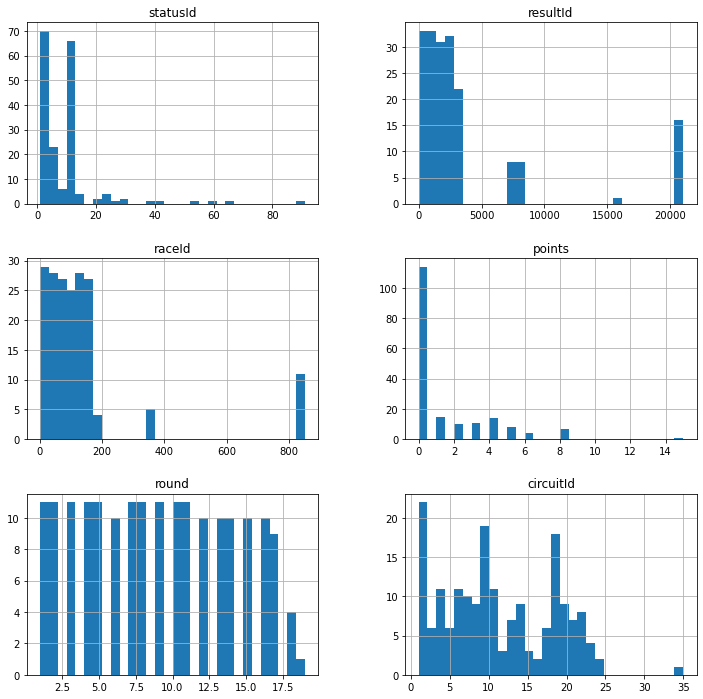

In [64]:
# distribution of num variables
# plot the histogram to the num variables
driver_results[num_cols].hist(bins=30, figsize=(12,12))
plt.show()

<AxesSubplot:ylabel='resultId'>

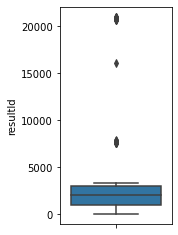

In [65]:
# find outliers for resultId
plt.figure(figsize=(2, 4))
sns.boxplot(y=driver_results['resultId'])
# there are outliers for this variable

<AxesSubplot:ylabel='raceId'>

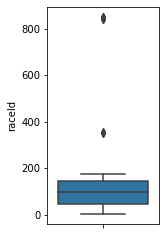

In [66]:
# find outliers for raceId
plt.figure(figsize=(2, 4))
sns.boxplot(y=driver_results['raceId'])
# there are outliers for this variable

<AxesSubplot:ylabel='points'>

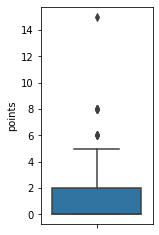

In [67]:
# find outliers for points
plt.figure(figsize=(2, 4))
sns.boxplot(y=driver_results['points'])
# there are outliers for this variable 

<AxesSubplot:ylabel='statusId'>

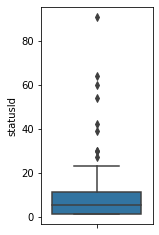

In [68]:
# find outliers for statusId
plt.figure(figsize=(2, 4))
sns.boxplot(y=driver_results['statusId'])
# there are outliers for this variable

<AxesSubplot:ylabel='circuitId'>

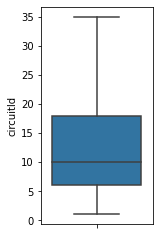

In [69]:
# find outliers for circuitId
plt.figure(figsize=(2, 4))
sns.boxplot(y=driver_results['circuitId'])
# there are no outliers for this variable

<AxesSubplot:ylabel='round'>

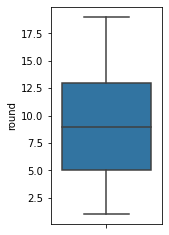

In [70]:
# find outliers for round
plt.figure(figsize=(2, 4))
sns.boxplot(y=driver_results['round'])
# there are no outliers for this variable

In [71]:
# for outlier trimming for points, resultId, raceId, statusId, circuitId, and round

def find_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

#### for the variable 'points' <a id="points"></a>

[back to report](#DataTransformation)

In [72]:
# find limits for points

points_upper_limit, points_lower_limit = find_boundaries(driver_results, 'points', 1.5)
points_upper_limit, points_lower_limit

(5.0, -3.0)

In [73]:
# flag the outliers in the data set for points

outliers_points = np.where(driver_results['points'] > points_upper_limit, True,
                       np.where(driver_results['points'] < points_lower_limit, True, False))

In [74]:
# trim the dataset by removing only points outliers

driver_results = driver_results.loc[~outliers_points]

driver_results.shape

(172, 8)

<AxesSubplot:ylabel='points'>

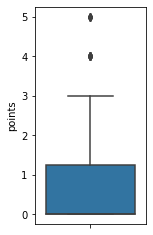

In [75]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=driver_results['points'])

#### for the variable 'resultId' <a id="resultId"></a>

[back to report](#DataTransformation)

In [76]:
# find limits for resultId

points_upper_limit, points_lower_limit = find_boundaries(driver_results, 'resultId', 1.5)
points_upper_limit, points_lower_limit

(5936.875, -1844.125)

In [77]:
# flag the outliers in the data set for resultId

outliers_points = np.where(driver_results['resultId'] > points_upper_limit, True,
                       np.where(driver_results['resultId'] < points_lower_limit, True, False))

In [78]:
# trim the dataset by removing only resultId outliers

driver_results = driver_results.loc[~outliers_points]

driver_results.shape

(141, 8)

<AxesSubplot:ylabel='resultId'>

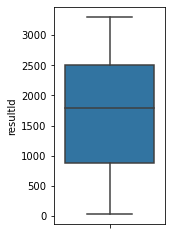

In [79]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=driver_results['resultId'])

#### for the variable 'raceId' <a id="raceId"></a>

[back to report](#DataTransformation)

In [80]:
# find limits for raceId

points_upper_limit, points_lower_limit = find_boundaries(driver_results, 'raceId', 1.5)
points_upper_limit, points_lower_limit

(256.5, -59.5)

In [81]:
# flag the outliers in the data set for raceId

outliers_points = np.where(driver_results['raceId'] > points_upper_limit, True,
                       np.where(driver_results['raceId'] < points_lower_limit, True, False))

In [82]:
# trim the dataset by removing only raceId outliers

driver_results = driver_results.loc[~outliers_points]

driver_results.shape

(141, 8)

<AxesSubplot:ylabel='raceId'>

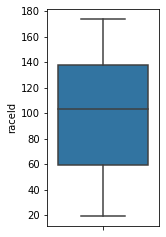

In [83]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=driver_results['raceId'])

#### for the variable 'statusId' <a id="statusId"></a>

[back to report](#DataTransformation)

In [84]:
# find limits for statusId

points_upper_limit, points_lower_limit = find_boundaries(driver_results, 'statusId', 1.5)
points_upper_limit, points_lower_limit

(26.0, -14.0)

In [85]:
# flag the outliers in the data set for statusId

outliers_points = np.where(driver_results['statusId'] > points_upper_limit, True,
                       np.where(driver_results['statusId'] < points_lower_limit, True, False))

In [86]:
# trim the dataset by removing only statusId outliers

driver_results = driver_results.loc[~outliers_points]

driver_results.shape

(134, 8)

<AxesSubplot:ylabel='statusId'>

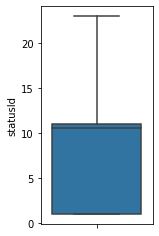

In [87]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=driver_results['statusId'])

#### Heat Map for Correlations between variables <a id="heatmap"></a>

[back to report](#Others)

In [88]:
driver_results.corr()

,statusId,resultId,raceId,points,round,circuitId
statusId,1.000000,0.399114,0.398407,-0.510762,-0.051563,0.002306
resultId,0.399114,1.000000,0.999877,-0.483640,0.085634,0.170945
raceId,0.398407,0.999877,1.000000,-0.479082,0.084710,0.171645
points,-0.510762,-0.483640,-0.479082,1.000000,-0.079342,-0.160470
round,-0.051563,0.085634,0.084710,-0.079342,1.000000,0.501046
circuitId,0.002306,0.170945,0.171645,-0.160470,0.501046,1.000000


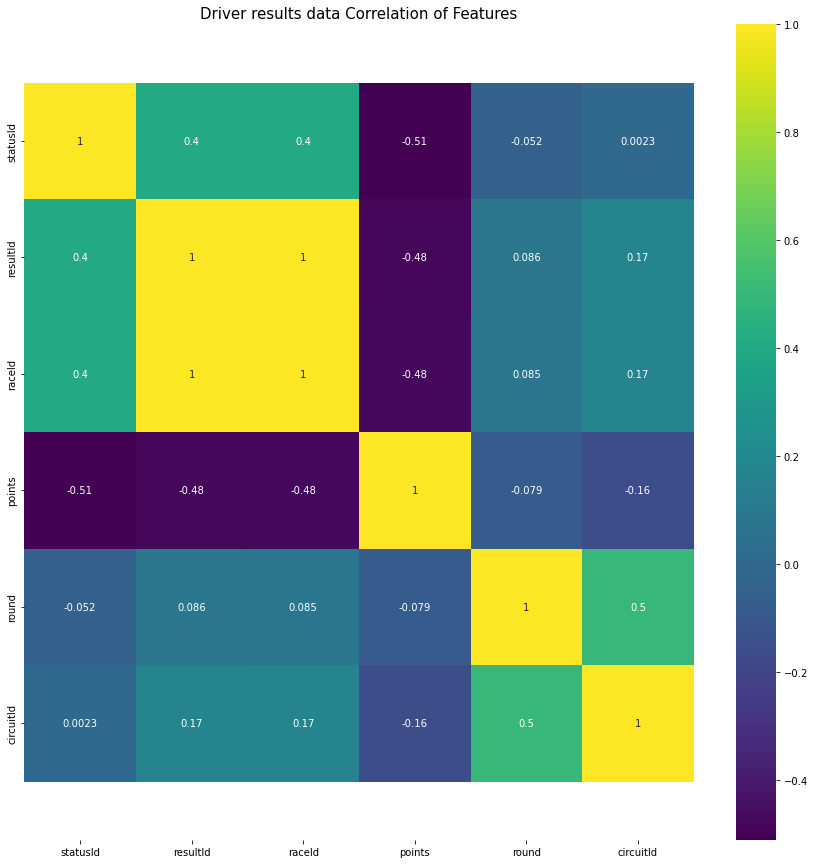

In [89]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Driver results data Correlation of Features', size=15)
ax = sns.heatmap(driver_results.corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [90]:
# Numerical data transformation

In [91]:
# plot histogram and Q-Q plots to have a look at the variable distribution

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

#### for variable points

In [92]:
# make a copy of the dataframe where we will store the modified variables, to explore various types of transformations

data_test = driver_results.copy()

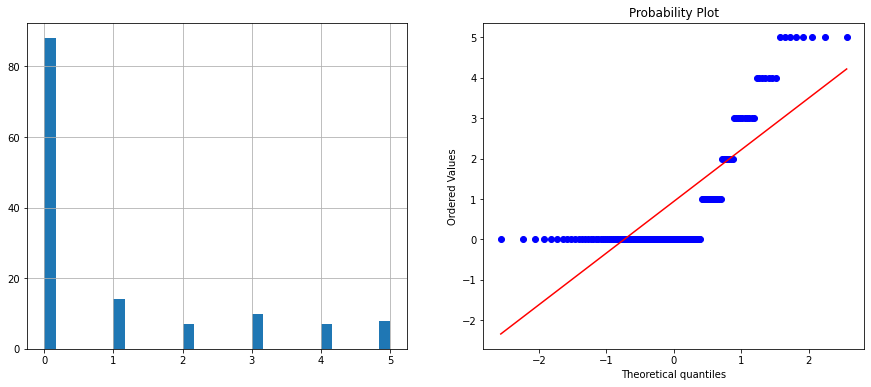

In [93]:
# check original distribution
diagnostic_plots(data_test, 'points')

In [94]:
# using Cube root Transformations with Feature Engine

# set up PowerTransformer with the cube root exponent
et = PowerTransformer(variables = ['points'], exp=1/3) # for cube root

# fit transformer to data 
et.fit(data_test)

PowerTransformer(exp=0.3333333333333333, variables=['points'])

In [95]:
# transform indicated variables within our dataframe
data_test_tf = et.transform(data_test)

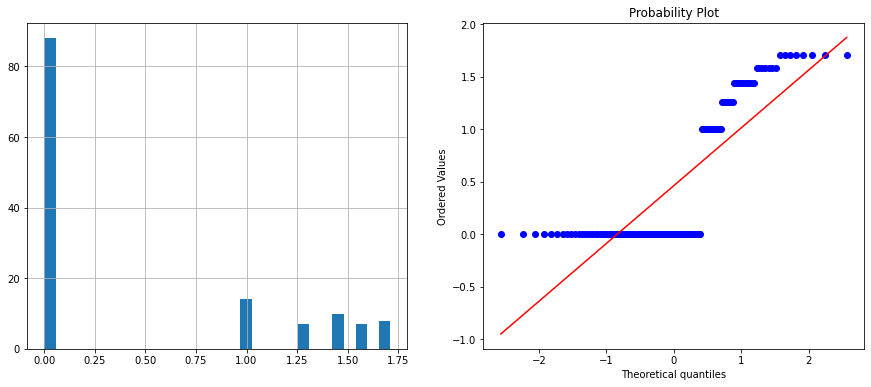

In [96]:
# visualize the trasnformation

diagnostic_plots(data_test_tf, 'points')

In [97]:
# using Reciprocal Transformations with Feature Engine 

# initialize the transformer
#rt = ReciprocalTransformer(variables = ['points'])

# fit transformer to the entire dataframe
#rt.fit(data_test)

# cant be applied due to 'some variables containing the value zero', hence can't apply reciprocal transformation.

In [98]:
# using Box-Cox transformation with Feature Engine
# initialize the transformer with variables to transform
#bct = BoxCoxTransformer(variables = ['points'])

# fit transformer to the data set
#bct.fit(data_test)

# cant be applied as 'Data must be positive.'

In [99]:
# using Square root Transformations with Feature Engine

# set up PowerTransformer with the square root exponent
et = PowerTransformer(variables = ['points'], exp=1/2) # for square root

# fit transformer to data 
et.fit(data_test)

PowerTransformer(variables=['points'])

In [100]:
# transform indicated variables within our dataframe
data_test_tf = et.transform(data_test)

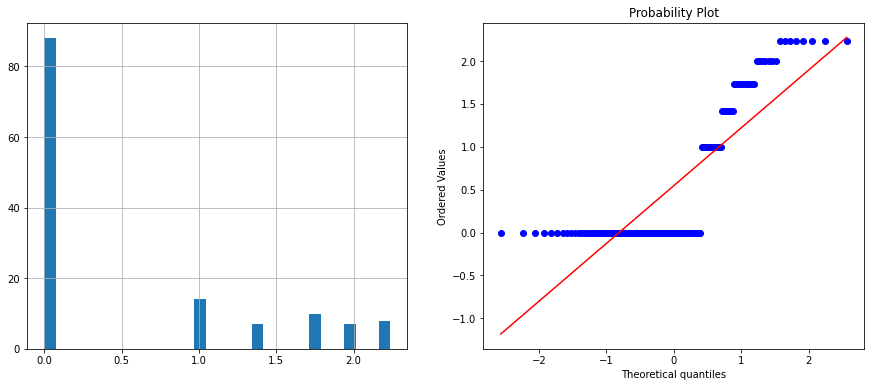

In [101]:
# visualize the trasnformation

diagnostic_plots(data_test_tf, 'points')

After looking and comparing at the transformations, I decided that the variable points does not require any transformations. 

#### for variable round

In [102]:
# make a copy of the dataframe where we will store the modified variables, to explore various types of transformations

data_test = driver_results.copy()

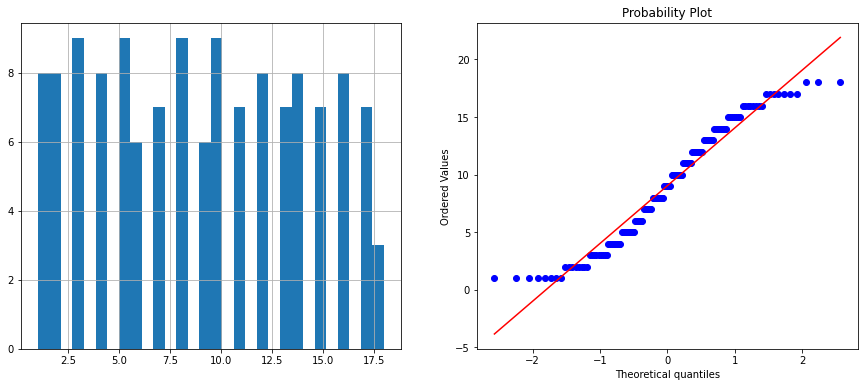

In [103]:
# check original distribution
diagnostic_plots(data_test, 'round')

In [104]:
# using Reciprocal Transformations with Feature Engine 

# initialize the transformer
rt = ReciprocalTransformer(variables = ['round'])

# fit transformer to the entire dataframe
rt.fit(data_test)


ReciprocalTransformer(variables=['round'])

In [105]:
# transform the indicated variable within our data set
data_test_tf = rt.transform(data_test)

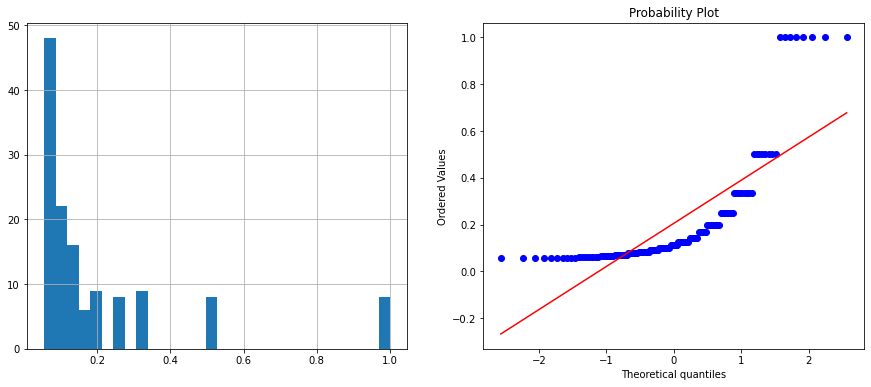

In [106]:
# visualize the trasnformation - reciprocal 

diagnostic_plots(data_test_tf, 'round')

In [107]:
# using Cube root Transformations with Feature Engine

# set up PowerTransformer with the cube root exponent
et = PowerTransformer(variables = ['round'], exp=1/3) # for cube root

# fit transformer to data 
et.fit(data_test)

PowerTransformer(exp=0.3333333333333333, variables=['round'])

In [108]:
# transform indicated variables within our dataframe
data_test_tf = et.transform(data_test)

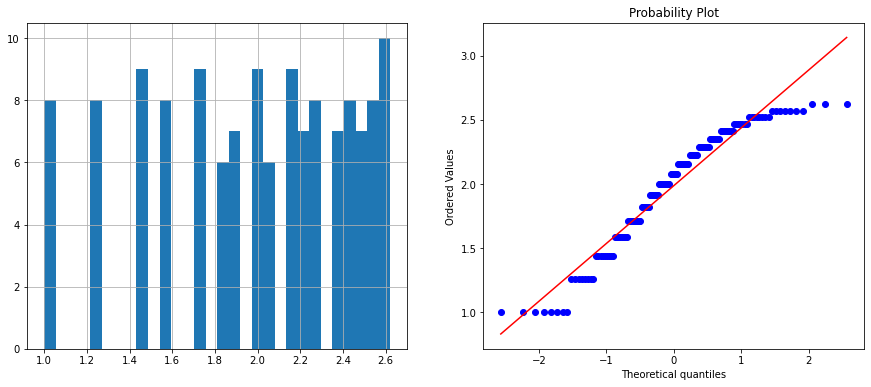

In [109]:
# visualize the trasnformation - cube root

diagnostic_plots(data_test_tf, 'round')

In [110]:
# using Square root Transformations with Feature Engine

# set up PowerTransformer with the cube root exponent
et = PowerTransformer(variables = ['round'], exp=1/2) # for square root

# fit transformer to data 
et.fit(data_test)

PowerTransformer(variables=['round'])

In [111]:
# transform indicated variables within our dataframe
data_test_tf = et.transform(data_test)

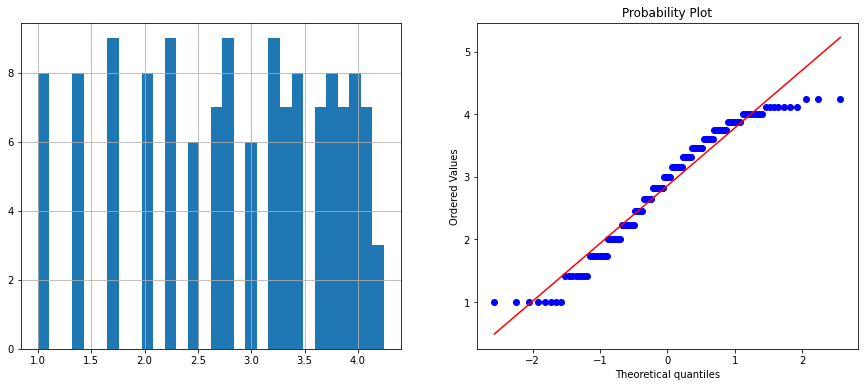

In [112]:
# visualize the trasnformation - square root

diagnostic_plots(data_test_tf, 'round')

In [113]:
# using Box-Cox transformation with Feature Engine

# initialize the transformer with variables to transform
bct = BoxCoxTransformer(variables = ['round'])

# fit transformer to the data set
bct.fit(data_test)

BoxCoxTransformer(variables=['round'])

In [114]:
# transform indicated variables within our dataframe
data_test_tf = et.transform(data_test)

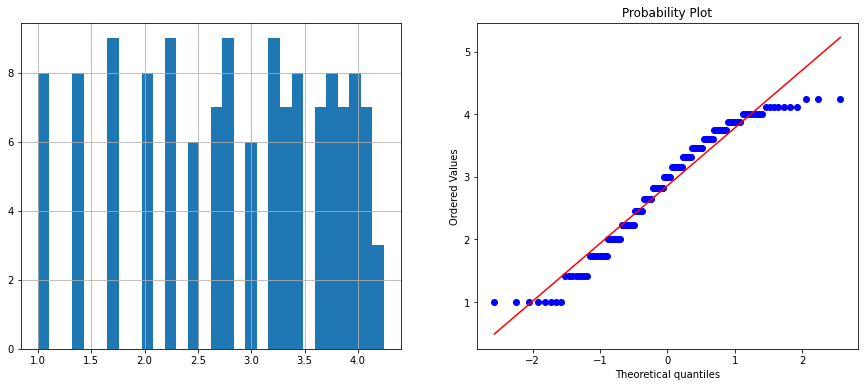

In [115]:
# visualize the trasnformation - box-cot

diagnostic_plots(data_test_tf, 'round')

After using the few transformation, I have decided to use Square root Transformations with Feature Engine for the variable 'round'

In [116]:
# using Square root Transformations with Feature Engine

# set up PowerTransformer with the cube root exponent
et = PowerTransformer(variables = ['round'], exp=1/2) # for square root

# fit transformer to data 
et.fit(driver_results)

PowerTransformer(variables=['round'])

In [117]:
# transform indicated variables within our dataframe
driver_results_tf = et.transform(driver_results)

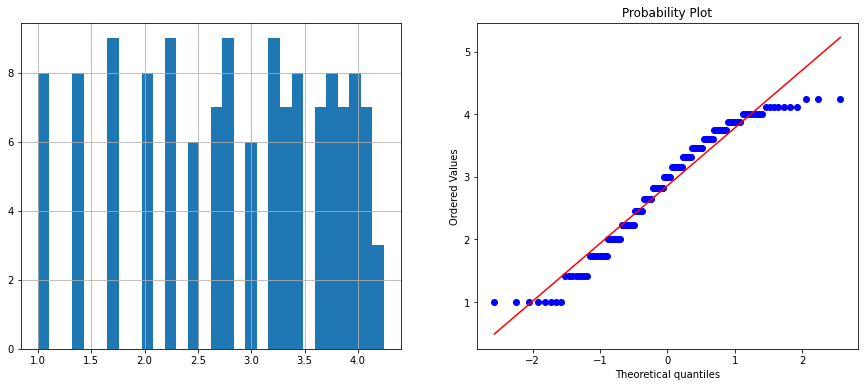

In [118]:
# visualize the trasnformation - square root

diagnostic_plots(driver_results_tf, 'round')

#### for variable circuitId

In [119]:
# make a copy of the dataframe where we will store the modified variables, to explore various types of transformations

data_test = driver_results.copy()

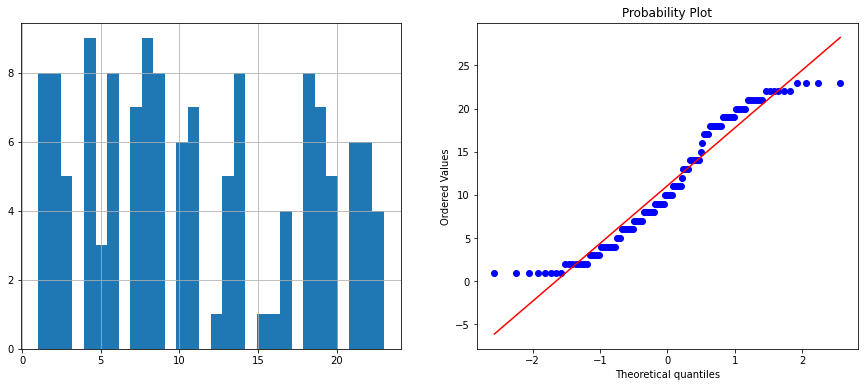

In [120]:
# check original distribution for circuitId, using data_test to explore various transformations
diagnostic_plots(data_test, 'circuitId')

In [121]:
# using Reciprocal Transformations with Feature Engine 

# initialize the transformer
rt = ReciprocalTransformer(variables = ['circuitId'])

# fit transformer to the entire dataframe
rt.fit(data_test)


ReciprocalTransformer(variables=['circuitId'])

In [122]:
# transform the indicated variable within our data set
data_test_tf = rt.transform(data_test)

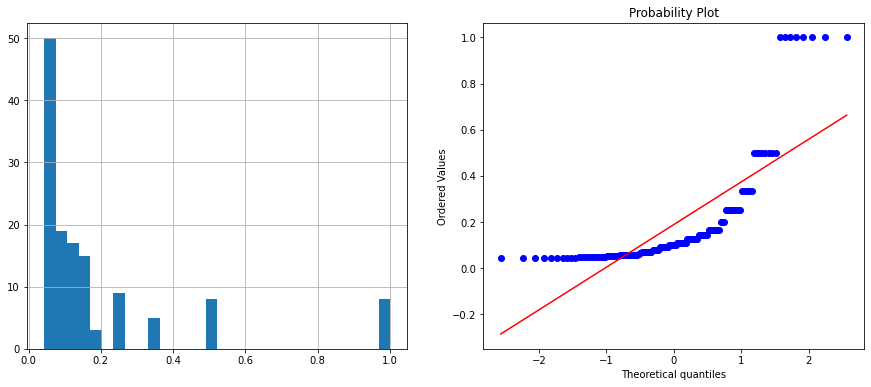

In [123]:
# visualize the trasnformation - reciprocal 

diagnostic_plots(data_test_tf, 'circuitId')

In [124]:
# using Square root Transformations with Feature Engine

# set up PowerTransformer with the cube root exponent
et = PowerTransformer(variables = ['circuitId'], exp=1/2) # for square root

# fit transformer to data 
et.fit(data_test)

PowerTransformer(variables=['circuitId'])

In [125]:
# transform indicated variables within our dataframe
data_test_tf = et.transform(data_test)

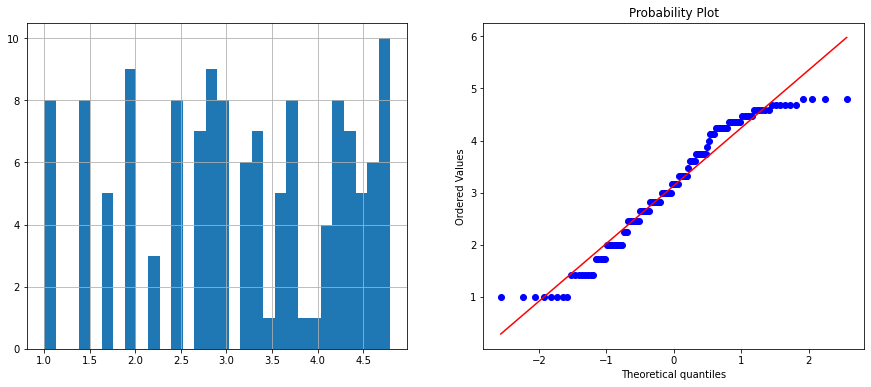

In [126]:
# visualize the trasnformation - square root

diagnostic_plots(data_test_tf, 'circuitId')

In [127]:
# using Box-Cox transformation with Feature Engine

# initialize the transformer with variables to transform
bct = BoxCoxTransformer(variables = ['circuitId'])

# fit transformer to the data set
bct.fit(data_test)

BoxCoxTransformer(variables=['circuitId'])

In [128]:
# transform indicated variables within our dataframe
data_test_tf = et.transform(data_test)

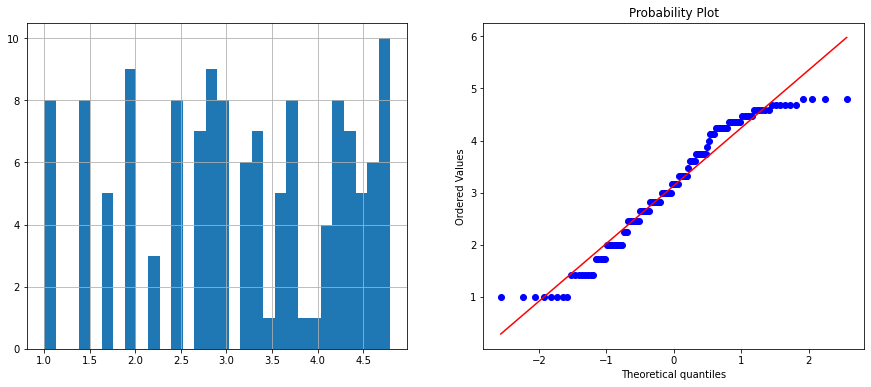

In [129]:
# visualize the trasnformation - box-cot

diagnostic_plots(data_test_tf, 'circuitId')

After using the few transformation, I have decided to use Box-Cox Transformations with Feature Engine for variable 'circuitId'

In [130]:
# using Box-Cox transformation with Feature Engine

# initialize the transformer with variables to transform
bct = BoxCoxTransformer(variables = ['circuitId'])

# fit transformer to the data set
bct.fit(driver_results)

BoxCoxTransformer(variables=['circuitId'])

In [131]:
# transform indicated variables within our dataframe
driver_results_tf = et.transform(driver_results)

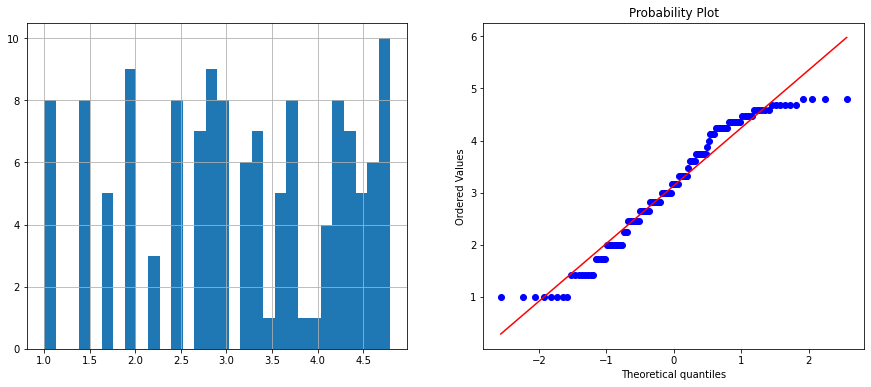

In [132]:
# visualize the trasnformation - box-cot

diagnostic_plots(driver_results_tf, 'circuitId')

In [133]:
# to check the null values for categorical variables again
driver_results[cat_cols].isnull().mean().sort_values()

status    0.0
name      0.0
dtype: float64

In [134]:
# Separate the data into training (70%) and testing sets (30%)
# Target Variable is "statusId"
X_train, X_test, y_train, y_test = train_test_split(
    driver_results, driver_results['statusId'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((93, 8), (41, 8))

#### for Categorical Data Encoding

#### One Hot Encoding <a id="OneHot"></a>

[back to report](#CategoricalData)

In [135]:
# for one hot encoding
driver_results.head()

,statusId,status,resultId,raceId,points,round,circuitId,name
12,1,Finished,28,19,3.0,2,2,Malaysian Grand Prix
23,1,Finished,75,21,0.0,4,4,Spanish Grand Prix
34,1,Finished,93,22,4.0,5,5,Turkish Grand Prix
52,14,+4 Laps,122,23,0.0,6,6,Monaco Grand Prix
54,1,Finished,161,25,0.0,8,8,French Grand Prix


In [136]:
# let's create the encoder
from feature_engine.encoding import OneHotEncoder

ohe_enc = OneHotEncoder(
    top_categories=None,
    drop_last=False)  # to return k-1, false to return k 

In [137]:
ohe_enc.fit(X_train)

OneHotEncoder()

In [138]:
# see which variables the encoder will encode

ohe_enc.variables_

['status', 'name']

In [139]:
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

X_train.head()

,statusId,resultId,raceId,points,round,circuitId,status_Finished,status_+1 Lap,status_Engine,status_Accident,...,name_European Grand Prix,name_United States Grand Prix,name_Chinese Grand Prix,name_Italian Grand Prix,name_French Grand Prix,name_Japanese Grand Prix,name_British Grand Prix,name_Austrian Grand Prix,name_Turkish Grand Prix,name_Singapore Grand Prix
180,1,416,38,5.0,3,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1522,11,1228,75,0.0,5,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1292,1,2650,145,1.0,5,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1764,5,3213,170,0.0,13,13,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1514,3,1157,71,0.0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [140]:
X_test.head() # encoded test set

,statusId,resultId,raceId,points,round,circuitId,status_Finished,status_+1 Lap,status_Engine,status_Accident,...,name_European Grand Prix,name_United States Grand Prix,name_Chinese Grand Prix,name_Italian Grand Prix,name_French Grand Prix,name_Japanese Grand Prix,name_British Grand Prix,name_Austrian Grand Prix,name_Turkish Grand Prix,name_Singapore Grand Prix
1716,11,2875,155,0.0,15,14,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1597,11,1827,105,0.0,16,17,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1207,1,705,51,2.0,16,17,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
114,1,273,31,4.0,14,14,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1744,4,2710,147,0.0,7,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Target mean encoding with Feature Engine <a id="Target"></a>

[back to report](#CategoricalData)

In [141]:
# for Target mean encoding with Feature Engine - got null / nan values
#X_train_TM = X_train 
#X_test_TM = X_test
#y_train_TM = y_train

In [142]:
# let's create the encoder

#mean_enc = MeanEncoder(variables=None)

In [143]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

#mean_enc.fit(X_train_TM, y_train_TM)

In [144]:
# variables that will be encoded

#mean_enc.variables_

In [145]:
# in the encoder dict we can observe the target mean per category
# per variable

#mean_enc.encoder_dict_

In [146]:
# let's transform train and test set

#X_train_enc = mean_enc.transform(X_train_TM)
#X_test_enc = mean_enc.transform(X_test_TM)

In [147]:
#X_train_enc.head()

In [148]:
#X_test_enc.head()

#### Ordinal integer encoding with Pandas <a id="OrdinalInteger"></a>

[back to report](#CategoricalData)

In [149]:
# explore the relationship between the variable and target

In [150]:
#X_train.groupby(['status'])['statusId'].mean().plot()
#plt.title('Relationship between status and the target')
#plt.ylabel('Mean of target')
#plt.show()

In [151]:
#X_train.groupby(['name'])['statusId'].mean().plot()
#plt.title('Relationship between name and the target')
#plt.ylabel('Mean of target')
#plt.show()

In [152]:
# for ordinal integer encoding with Pandas
#X_train_panda = X_train 
#X_test_panda = X_test

In [153]:
# for the variable status, to 'test' this method of encoding first

# let's order the labels in status according to the mean target value
#X_train.groupby(['status'])['statusId'].mean().sort_values()

In [154]:
# generate an ordered list with the labels of status

#ordered_labels = X_train.groupby(['status'])['statusId'].mean().sort_values().index

#ordered_labels

In [155]:
# next create a dictionary with the mappings of categories to numbers

#ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}

#ordinal_mapping

In [156]:
# inspect the encoded variable
#X_train['status'].head()

In [157]:
# replace the labels with the ordered numbers

#X_train['status'] = X_train['status'].map(ordinal_mapping)
#X_test['status'] = X_test['status'].map(ordinal_mapping)

In [158]:
# inspect the encoded variable
#X_train['status'].head()

In [159]:
# explore the monotonic relationship

#X_train.groupby(['status'])['statusId'].mean().plot()
#plt.title('Relationship between status and the target')
#plt.ylabel('Mean of target')
#plt.show()

In [160]:
# for the variable name

# let's order the labels in name according to the mean target value
#X_train.groupby(['name'])['statusId'].mean().sort_values()

In [161]:
# generate an ordered list with the labels of name

#ordered_labels = X_train.groupby(['name'])['statusId'].mean().sort_values().index

#ordered_labels

In [162]:
# next create a dictionary with the mappings of categories to numbers

#ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}

#ordinal_mapping

In [163]:
# inspect the encoded variable
#X_train['name'].head()

In [164]:
# replace the labels with the ordered numbers

#X_train['name'] = X_train['name'].map(ordinal_mapping)
#X_test['name'] = X_test['name'].map(ordinal_mapping)

In [165]:
# inspect the encoded variable
#X_train['name'].head()

In [166]:
# explore the monotonic relationship

#X_train.groupby(['name'])['statusId'].mean().plot()
#plt.title('Relationship between status and the target')
#plt.ylabel('Mean of target')
#plt.show()

After comparing the results of the various encoding, I decided to use one hot encoding as it did not produce any null values.

#### Variable Binning or Discretization

In [167]:
 # set up an equal-width discretizer into 10 intervals

disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

# let's fit the discretizer so it learns the interval limits
disc.fit(X_train[['points', 'round', 'circuitId']])  # might add more variables here, see how

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [168]:
# the interval limits are stored in the bin_edges_attribute

disc.bin_edges_ # same as interval limits

array([array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
       array([ 1. ,  2.7,  4.4,  6.1,  7.8,  9.5, 11.2, 12.9, 14.6, 16.3, 18. ]),
       array([ 1. ,  3.2,  5.4,  7.6,  9.8, 12. , 14.2, 16.4, 18.6, 20.8, 23. ])],
      dtype=object)

In [169]:
# transform the train set, with Sklearn returning Numpy arrays
train_t = disc.transform(X_train[['points', 'round', 'circuitId']])

# transform array to dataframe
train_t = pd.DataFrame(train_t, columns = ['points', 'round', 'circuitId'])

train_t.head()

,points,round,circuitId
0,9.0,1.0,0.0
1,0.0,2.0,1.0
2,2.0,2.0,1.0
3,0.0,7.0,5.0
4,0.0,0.0,0.0


In [170]:
# same thing for test set

test_t = disc.transform(X_test[['points', 'round', 'circuitId']])

test_t = pd.DataFrame(test_t, columns = ['points', 'round', 'circuitId'])

test_t.head()

,points,round,circuitId
0,0.0,8.0,5.0
1,0.0,8.0,7.0
2,4.0,8.0,7.0
3,8.0,7.0,5.0
4,0.0,3.0,2.0


#### for points <a id="binningpoints"></a>

[back to report](#Others)

Text(0, 0.5, 'Number of observations per bin')

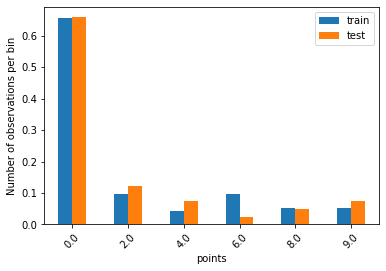

In [171]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

t1 = train_t.groupby(['points'])['points'].count() / len(train_t)
t2 = test_t.groupby(['points'])['points'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

#### for round <a id="binninground"></a>

[back to report](#Others)

Text(0, 0.5, 'Number of observations per bin')

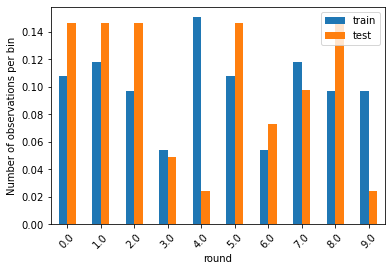

In [172]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

t1 = train_t.groupby(['round'])['round'].count() / len(train_t)
t2 = test_t.groupby(['round'])['round'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

#### for circuitId <a id="binningcircuitId"></a>

[back to report](#Others)

Text(0, 0.5, 'Number of observations per bin')

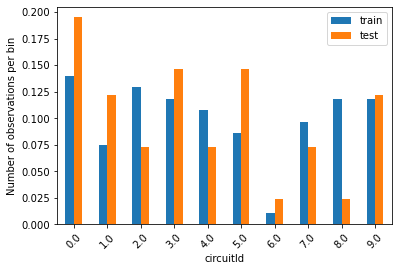

In [173]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

t1 = train_t.groupby(['circuitId'])['circuitId'].count() / len(train_t)
t2 = test_t.groupby(['circuitId'])['circuitId'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

### Feature Scaling

#### Mean-normalization <a id="meannormal"></a>

[back to report](#Others)

In [174]:
# Using Mean-normalization

In [175]:
# Learn the mean from the train set

means = X_train.mean(axis=0)
means

statusId                            7.290323
resultId                         1771.344086
raceId                            102.193548
points                              0.956989
round                               9.268817
circuitId                          11.451613
status_Finished                     0.290323
status_+1 Lap                       0.301075
status_Engine                       0.086022
status_Accident                     0.032258
status_+4 Laps                      0.032258
status_+2 Laps                      0.086022
status_Transmission                 0.021505
status_Suspension                   0.021505
status_Hydraulics                   0.010753
status_Collision                    0.075269
status_Electrical                   0.010753
status_Spun off                     0.010753
status_Brakes                       0.010753
status_Clutch                       0.010753
name_Bahrain Grand Prix             0.032258
name_Spanish Grand Prix             0.064516
name_Belgi

In [176]:
# Now learn the min and max values, and the value range from the train set

ranges = X_train.max(axis=0)-X_train.min(axis=0)
ranges

statusId                           22.0
resultId                         3274.0
raceId                            155.0
points                              5.0
round                              17.0
circuitId                          22.0
status_Finished                     1.0
status_+1 Lap                       1.0
status_Engine                       1.0
status_Accident                     1.0
status_+4 Laps                      1.0
status_+2 Laps                      1.0
status_Transmission                 1.0
status_Suspension                   1.0
status_Hydraulics                   1.0
status_Collision                    1.0
status_Electrical                   1.0
status_Spun off                     1.0
status_Brakes                       1.0
status_Clutch                       1.0
name_Bahrain Grand Prix             1.0
name_Spanish Grand Prix             1.0
name_Belgian Grand Prix             1.0
name_Australian Grand Prix          1.0
name_Monaco Grand Prix              1.0


In [177]:
X_train_scaled_mn = (X_train - means) / ranges
X_test_scaled_mn = (X_test - means) / ranges

In [178]:
X_train.head()

,statusId,resultId,raceId,points,round,circuitId,status_Finished,status_+1 Lap,status_Engine,status_Accident,...,name_European Grand Prix,name_United States Grand Prix,name_Chinese Grand Prix,name_Italian Grand Prix,name_French Grand Prix,name_Japanese Grand Prix,name_British Grand Prix,name_Austrian Grand Prix,name_Turkish Grand Prix,name_Singapore Grand Prix
180,1,416,38,5.0,3,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1522,11,1228,75,0.0,5,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1292,1,2650,145,1.0,5,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1764,5,3213,170,0.0,13,13,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1514,3,1157,71,0.0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [179]:
X_train_scaled_mn

,statusId,resultId,raceId,points,round,circuitId,status_Finished,status_+1 Lap,status_Engine,status_Accident,...,name_European Grand Prix,name_United States Grand Prix,name_Chinese Grand Prix,name_Italian Grand Prix,name_French Grand Prix,name_Japanese Grand Prix,name_British Grand Prix,name_Austrian Grand Prix,name_Turkish Grand Prix,name_Singapore Grand Prix
180,-0.285924,-0.413972,-0.414152,0.808602,-0.368754,-0.384164,0.709677,-0.301075,-0.086022,-0.032258,...,-0.043011,-0.075269,-0.021505,-0.032258,-0.064516,-0.053763,-0.053763,-0.021505,-0.010753,-0.010753
1522,0.168622,-0.165957,-0.175442,-0.191398,-0.251107,-0.338710,-0.290323,0.698925,-0.086022,-0.032258,...,-0.043011,-0.075269,-0.021505,-0.032258,-0.064516,-0.053763,-0.053763,-0.021505,-0.010753,-0.010753
1292,-0.285924,0.268374,0.276171,0.008602,-0.251107,-0.338710,0.709677,-0.301075,-0.086022,-0.032258,...,-0.043011,-0.075269,-0.021505,-0.032258,-0.064516,-0.053763,-0.053763,-0.021505,-0.010753,-0.010753
1764,-0.104106,0.440335,0.437461,-0.191398,0.219481,0.070381,-0.290323,-0.301075,0.913978,-0.032258,...,-0.043011,-0.075269,-0.021505,-0.032258,-0.064516,-0.053763,-0.053763,-0.021505,-0.010753,-0.010753
1514,-0.195015,-0.187643,-0.201249,-0.191398,-0.486401,-0.475073,-0.290323,-0.301075,-0.086022,0.967742,...,-0.043011,-0.075269,-0.021505,-0.032258,-0.064516,-0.053763,-0.053763,-0.021505,-0.010753,-0.010753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,-0.285924,-0.451235,-0.452862,0.408602,0.337128,0.161290,0.709677,-0.301075,-0.086022,-0.032258,...,-0.043011,-0.075269,-0.021505,-0.032258,-0.064516,-0.053763,-0.053763,-0.021505,-0.010753,0.989247
1753,-0.149560,0.418649,0.418106,-0.191398,0.043011,0.524927,-0.290323,-0.301075,-0.086022,-0.032258,...,-0.043011,-0.075269,-0.021505,-0.032258,-0.064516,-0.053763,-0.053763,0.978495,-0.010753,-0.010753
1593,0.214076,-0.001632,-0.001249,-0.191398,0.219481,-0.020528,-0.290323,-0.301075,-0.086022,-0.032258,...,-0.043011,-0.075269,-0.021505,-0.032258,-0.064516,-0.053763,-0.053763,-0.021505,-0.010753,-0.010753
1786,0.168622,0.152308,0.160042,-0.191398,-0.309930,0.434018,-0.290323,0.698925,-0.086022,-0.032258,...,-0.043011,-0.075269,-0.021505,-0.032258,-0.064516,-0.053763,-0.053763,-0.021505,-0.010753,-0.010753


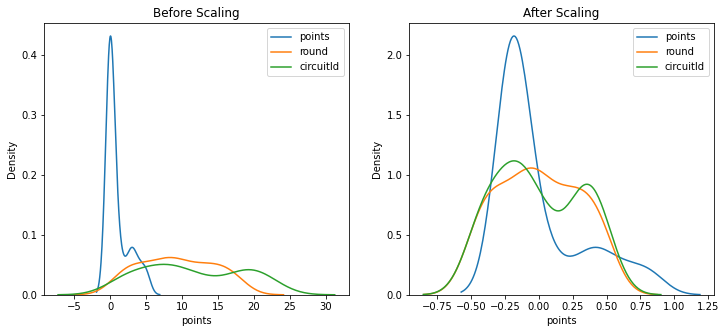

In [180]:
# compare the variable distributions before and after scaling

# points, round, circuitId
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['points'], ax=ax1, label ='points')
sns.kdeplot(X_train['round'], ax=ax1, label ='round')
sns.kdeplot(X_train['circuitId'], ax=ax1, label ='circuitId')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled_mn['points'], ax=ax2, label ='points')
sns.kdeplot(X_train_scaled_mn['round'], ax=ax2, label ='round')
sns.kdeplot(X_train_scaled_mn['circuitId'], ax=ax2, label ='circuitId')
ax2.legend()
plt.show()

#### Standardization from sklearn <a id="standardization"></a>

[back to report](#Others)

In [181]:
# Using Standardization from sklearn

In [182]:
# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled_ss = scaler.transform(X_train)
X_test_scaled_ss = scaler.transform(X_test)

In [183]:
# the scaler stores the mean of the features, learned from train set

scaler.mean_

array([7.29032258e+00, 1.77134409e+03, 1.02193548e+02, 9.56989247e-01,
       9.26881720e+00, 1.14516129e+01, 2.90322581e-01, 3.01075269e-01,
       8.60215054e-02, 3.22580645e-02, 3.22580645e-02, 8.60215054e-02,
       2.15053763e-02, 2.15053763e-02, 1.07526882e-02, 7.52688172e-02,
       1.07526882e-02, 1.07526882e-02, 1.07526882e-02, 1.07526882e-02,
       3.22580645e-02, 6.45161290e-02, 5.37634409e-02, 5.37634409e-02,
       6.45161290e-02, 6.45161290e-02, 6.45161290e-02, 5.37634409e-02,
       7.52688172e-02, 4.30107527e-02, 4.30107527e-02, 4.30107527e-02,
       7.52688172e-02, 2.15053763e-02, 3.22580645e-02, 6.45161290e-02,
       5.37634409e-02, 5.37634409e-02, 2.15053763e-02, 1.07526882e-02,
       1.07526882e-02])

In [184]:
# the scaler stores the standard deviation of the features,
# learned from train set

scaler.scale_

array([5.47836536e+00, 9.55563759e+02, 4.57372717e+01, 1.55828675e+00,
       5.03138491e+00, 6.77997705e+00, 4.53911203e-01, 4.58725355e-01,
       2.80395802e-01, 1.76684696e-01, 1.76684696e-01, 2.80395802e-01,
       1.45061694e-01, 1.45061694e-01, 1.03136162e-01, 2.63824605e-01,
       1.03136162e-01, 1.03136162e-01, 1.03136162e-01, 1.03136162e-01,
       1.76684696e-01, 2.45670100e-01, 2.25550290e-01, 2.25550290e-01,
       2.45670100e-01, 2.45670100e-01, 2.45670100e-01, 2.25550290e-01,
       2.63824605e-01, 2.02881315e-01, 2.02881315e-01, 2.02881315e-01,
       2.63824605e-01, 1.45061694e-01, 1.76684696e-01, 2.45670100e-01,
       2.25550290e-01, 2.25550290e-01, 1.45061694e-01, 1.03136162e-01,
       1.03136162e-01])

In [185]:
# transform the returned NumPy arrays to dataframes

X_train_scaled_ss = pd.DataFrame(X_train_scaled_ss, columns=X_train.columns)
X_test_scaled_ss = pd.DataFrame(X_test_scaled_ss, columns=X_test.columns)

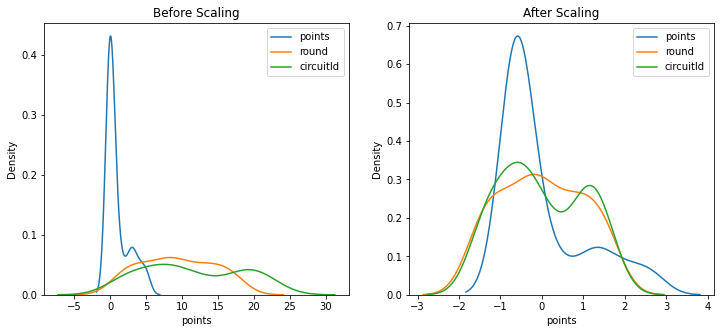

In [186]:
# let's compare the variable distributions before and after scaling

# points, round, circuitId
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['points'], ax=ax1, label ='points')
sns.kdeplot(X_train['round'], ax=ax1, label ='round')
sns.kdeplot(X_train['circuitId'], ax=ax1, label ='circuitId')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled_ss['points'], ax=ax2, label ='points')
sns.kdeplot(X_train_scaled_ss['round'], ax=ax2, label ='round')
sns.kdeplot(X_train_scaled_ss['circuitId'], ax=ax2, label ='circuitId')
ax2.legend()
plt.show()

#### MinMaxScaling <a id="minmax"></a>

[back to report](#Others)

In [187]:
# MinMaxScaling 

In [188]:
# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler

In [189]:
# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled_mms = scaler.transform(X_train)
X_test_scaled_mms = scaler.transform(X_test)

In [190]:
# the scaler stores the maximum values of the features, learned from train set
scaler.data_max_

array([2.300e+01, 3.302e+03, 1.740e+02, 5.000e+00, 1.800e+01, 2.300e+01,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00])

In [191]:
# the scaler stores the minimum values of the features, learned from train set
scaler.min_

array([-0.04545455, -0.00855223, -0.12258065,  0.        , -0.05882353,
       -0.04545455,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [192]:
# the scaler also stores the value range (max -  min)

scaler.data_range_

array([2.200e+01, 3.274e+03, 1.550e+02, 5.000e+00, 1.700e+01, 2.200e+01,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00])

In [193]:
# Transform the returned NumPy arrays to dataframes
X_train_scaled_mms = pd.DataFrame(X_train_scaled_mms, columns=X_train.columns)
X_test_scaled_mms = pd.DataFrame(X_test_scaled_mms, columns=X_test.columns)

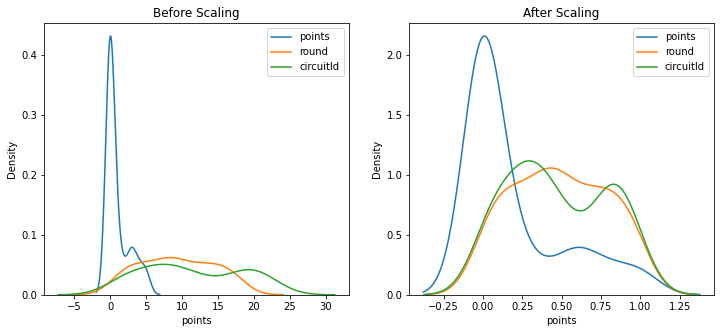

In [194]:
# let's compare the variable distributions before and after scaling

# points, round, circuitId
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['points'], ax=ax1, label ='points')
sns.kdeplot(X_train['round'], ax=ax1, label ='round')
sns.kdeplot(X_train['circuitId'], ax=ax1, label ='circuitId')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled_mms['points'], ax=ax2, label ='points')
sns.kdeplot(X_train_scaled_mms['round'], ax=ax2, label ='round')
sns.kdeplot(X_train_scaled_mms['circuitId'], ax=ax2, label ='circuitId')
ax2.legend()
plt.show()

### Step 4: Machine Learning Modelling 

#### Number of rows and columns in final dataset <a id="finalset"></a>

[back to report](#MachineLearningModel)

In [195]:
display(driver_results)

,statusId,status,resultId,raceId,points,round,circuitId,name
12,1,Finished,28,19,3.0,2,2,Malaysian Grand Prix
23,1,Finished,75,21,0.0,4,4,Spanish Grand Prix
34,1,Finished,93,22,4.0,5,5,Turkish Grand Prix
52,14,+4 Laps,122,23,0.0,6,6,Monaco Grand Prix
54,1,Finished,161,25,0.0,8,8,French Grand Prix
...,...,...,...,...,...,...,...,...
1813,23,Brakes,2252,126,0.0,3,18,Brazilian Grand Prix
1815,13,+3 Laps,3034,162,0.0,5,4,Spanish Grand Prix
1817,20,Spun off,2595,142,0.0,2,2,Malaysian Grand Prix
1819,20,Spun off,3228,171,0.0,14,14,Italian Grand Prix


### Linear Regression Model

#### Feature Engine Mean-normalization

In [196]:
# for feature engine mean-normalization

In [197]:
X_train_final = X_train_scaled_mn
X_test_final = X_test_scaled_mn

y_train_final = y_train
y_test_final = y_test

In [198]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [199]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Root Mean Square Error (RMSE)
print('train_rmse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_rmse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_rmse: 3.6134918884317314e-29 
 test_rmse: 0.12410788785701897
train_r-sq: 1.0 
 test_r-sq: 0.9955810946478089


#### Standardization from sklearn

In [200]:
# for Standardization from sklearn

In [201]:
X_train_final = X_train_scaled_ss
X_test_final = X_test_scaled_ss

y_train_final = y_train
y_test_final = y_test

In [202]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Root Mean Square Error (RMSE)
print('train_rmse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_rmse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_rmse: 4.255607700530985e-29 
 test_rmse: 0.23571505828876735
train_r-sq: 1.0 
 test_r-sq: 0.9916072817719347


#### MinMaxScaling

In [203]:
# for MinMaxScaling 

In [204]:
X_train_final = X_train_scaled_mms
X_test_final = X_test_scaled_mms

y_train_final = y_train
y_test_final = y_test

In [205]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Root Mean Square Error (RMSE)
print('train_rmse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_rmse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_rmse: 2.5048454334598365e-29 
 test_rmse: 0.1241078878570187
train_r-sq: 1.0 
 test_r-sq: 0.9955810946478089


#### For Naïve Baseline Model

In [206]:
# examine X_train_scaled_mms, as it has the best fit and model performance among the 3 methods

print(X_train_scaled_mms.shape)
print(type(X_train_scaled_mms))
X_train_scaled_mms[0:5]

(93, 41)
<class 'pandas.core.frame.DataFrame'>


,statusId,resultId,raceId,points,round,circuitId,status_Finished,status_+1 Lap,status_Engine,status_Accident,...,name_European Grand Prix,name_United States Grand Prix,name_Chinese Grand Prix,name_Italian Grand Prix,name_French Grand Prix,name_Japanese Grand Prix,name_British Grand Prix,name_Austrian Grand Prix,name_Turkish Grand Prix,name_Singapore Grand Prix
0,0.000000,0.118509,0.122581,1.0,0.117647,0.090909,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.454545,0.366524,0.361290,0.0,0.235294,0.136364,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.800855,0.812903,0.2,0.235294,0.136364,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.181818,0.972816,0.974194,0.0,0.705882,0.545455,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.090909,0.344838,0.335484,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [207]:
# lets examine X_test_scaled_mms

print(X_test_scaled_mms.shape)
print(type(X_test_scaled_mms))
X_test_scaled_mms[0:5]

(41, 41)
<class 'pandas.core.frame.DataFrame'>


,statusId,resultId,raceId,points,round,circuitId,status_Finished,status_+1 Lap,status_Engine,status_Accident,...,name_European Grand Prix,name_United States Grand Prix,name_Chinese Grand Prix,name_Italian Grand Prix,name_French Grand Prix,name_Japanese Grand Prix,name_British Grand Prix,name_Austrian Grand Prix,name_Turkish Grand Prix,name_Singapore Grand Prix
0,0.454545,0.869578,0.877419,0.0,0.823529,0.590909,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.454545,0.549481,0.554839,0.0,0.882353,0.727273,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.206781,0.206452,0.4,0.882353,0.727273,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.074832,0.077419,0.8,0.764706,0.590909,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.136364,0.819181,0.825806,0.0,0.352941,0.227273,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [208]:
# lets examine y_train

print(y_train.shape)
print(type(y_train))
y_train[0:5]

(93,)
<class 'pandas.core.series.Series'>


180      1
1522    11
1292     1
1764     5
1514     3
Name: statusId, dtype: int64

In [209]:
# lets examine y_test

print(y_test.shape)
print(type(y_test))
y_test[0:5]

(41,)
<class 'pandas.core.series.Series'>


1716    11
1597    11
1207     1
114      1
1744     4
Name: statusId, dtype: int64

Num of rows/cols should be same between X_train_scaled_mms, y_train / X_test_scaled_mms, y_test

In [210]:
# Naive Baseline model - classification

In [211]:
import numpy as np
from scipy import stats

# pick the modal class from train data
print(stats.mode(y_train))

modal_class_label = stats.mode(y_train)[0]

ModeResult(mode=array([11], dtype=int64), count=array([28]))


In [212]:
y_train_preds_naive = [int(modal_class_label) for row in X_train.iloc[:,0]]
y_train_preds_naive[0:5]

[11, 11, 11, 11, 11]

In [213]:
y_test_preds_naive = [int(modal_class_label) for row in X_test.iloc[:,0]]
y_test_preds_naive[0:5]

[11, 11, 11, 11, 11]

In [214]:
# scoring accuracy of model
# note that other metrics exist, eg. AUC-ROC, Confusion Matrix-Based Metrics, but these matter more for imbalanced data
# where classes don't share same representation, eg. class 0 is 80%, class 1 is 10%, class 2 is 10%
# and are advanced Machine Learning topics

from sklearn.metrics import accuracy_score

# train accuracy score
y_true = y_train
y_pred = y_train_preds_naive

train_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on train data is {train_accuracy_naive:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_naive

test_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on test data is {test_accuracy_naive:.2f}%.")

The Naive Baseline Model's accuracy on train data is 30.11%.
The Naive Baseline Model's accuracy on test data is 39.02%.


In [215]:
# Decision Tree Model

In [216]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=404)
dtree.fit(X_train_scaled_mms, y_train)

DecisionTreeClassifier(random_state=404)

In [217]:
y_train_preds_dtree = dtree.predict(X_train_scaled_mms)
y_test_preds_dtree = dtree.predict(X_test_scaled_mms)

In [218]:
# train accuracy score

from sklearn.metrics import accuracy_score

y_true = y_train
y_pred = y_train_preds_dtree

train_accuracy_dtree = accuracy_score(y_true, y_pred) * 100
print(f"The DTree Model's accuracy on train data is {train_accuracy_dtree:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_dtree

test_accuracy_dtree = accuracy_score(y_true, y_pred) * 100
print(f"The DTRee Model's accuracy on test data is {test_accuracy_dtree:.2f}%.")

The DTree Model's accuracy on train data is 100.00%.
The DTRee Model's accuracy on test data is 87.80%.


### Report

# Table Of Contents <a id="TableOfContents"></a>
#### 1. [Introduction with Value Based Problem Statement](#Introduction)

#### 2. [Problem Formulation](#ProblemFormulation)
- Load and Explore the Data
- Understand the Data
- Formulate a Prediction Problem

#### 3. [Data Wrangling on multiple tables](#DataWrangling) 
- Extract and Create features from different tables
- Concatenate, Merge or Join the tables

#### 4. [Data Cleansing and Transformation](#DataTransformation) 
- Missing Value and Outliers
- Categorical Data
- Numerical Data
- Others 

#### 5. [Machine Learning Model](#MachineLearningModel)
- Feature Scaling
- Create new features / Drop features

#### 6. [Summary and Further Improvements](#Summaries)
- Summary of findings
- Explanation of the possible further improvments

## 1. Introduction with Value Based Problem Statement <a id="Introduction"></a>

[back to Table Of Contents](#TableOfContents)
    
This report is to provide detailed analysis on comparison, discussion, along with insights to the database provided. 

The Formula 1 (F1) database is from Ergast, which is a webservice that provides a database for F1 races; starting from 
the 1950 session until today. The dataset collected includes information such as the time taken in each lap, the time 
taken for pit stops, the performance in the qualifying round and more of all the F1 races. 
In addition, the datasets provided has a total number of 13 csv files / tables, as shown below:

Data csv files / tables |
--- |
circuits |
constructorResults |
constructorStandings |
constructors |
driverStandings |
drivers |
laptimes |
pitStops |
qualifying |
racess |
results |
seasons |
status |
    
With that, using the dataset provided, the aim is to predict whether Driver Nick Heidfeld will finish in a race. 
This aim allows the f1 team for the driver, Nick Heidfeld, to understand how they fair based on previous races.
In addition, fans of Nick Heidfeld would be interested in this prediction as well while watching his races. 

To be able to do so, I used techniques in problem formulation, along with data wrangling on multiple tables, 
and data cleansing with transformation. Lastly, I used a Machine Learning model to help answer the prediction problem. 


## 2. Problem Formulation <a id="ProblemFormulation"></a>

[back to Table Of Contents](#TableOfContents)

Before formulating the problem, I had to load and explore the data, along with understanding the data. 
    
### Load and Explore the Data
To start off, I loaded the 13 csv, using the function pd.read_csv() to read the csv file. Afterwards, I used the 
function .head() to display the first five rows to ensure that the dataset was loaded correctly. In addition, I used the
functions .info() and .describe() to find more details, such as dtypes and non-null count of the table. Lastly, for the 
columns that I am more interested in, I used the function .shape() to find the shape, which is the number of rows and 
columns, of the table.

### Understand the Data
The tables that I am more interested in are: drivers_data, results_data, status_mod and races_data.

Firstly, drivers_data contains details such as driverId, drvierRef, number, code, forename, surname, dob, nationality 
and url (to their personal information on Wikipedia). There are both int64 and object dtypes. I am interested in this 
table as it is necessary to know important driver details such as driverId, that uniquely represents each driver, and 
thus would be important in my prediction problem.

Secondly, results_data contains details such as resultId, raceId, driverId, constructorId, number, grid, position, 
positionText, positionOrder, points, laps, time, milliseconds, fastestLapTime, rank, fastestLapSpeed, and statusId. 
There are various dtypes in this table such as int64, object, and float64. I am interested in this table as it provides 
the overall results obtained by the driver, and it has statusId to give the status of the driver. 

Thirdly, status_mod contains details such as statusId and status. There are both int64 and object dtypes. I am interested
in this table as since I am concern whether the driver finishes the race, it is under the status category. 

Lastly, races_data contains details such as raceId, round, circuitId, name, date, time, and url 
(to more information about the race on Wikipedia). There are both int64 and object dtypes. I am interested in this 
table because it provides the name of each race through raceId. Additionally, through the function sort_values(), 
I found that the latest race provided is in 2012. 


### Formulate a Prediction Problem
From these tables, I formulated a prediction problem, whereby the aim is to predict whether Driver Nick Heidfeld 
finishes the race. With the columns containing variables such as driverId, statusId, and resultId, they would aid me 
in solving this prediction problem.  

## 3. Data Wrangling on multiple tables <a id="DataWrangling"></a>

[back to Table Of Contents](#TableOfContents)

With a Prediction Problem formulated, I created a Tabular Data table by extracting data from multiple tables, using 
techniques such as subsetting and filtering the tables, mering the tables, attempting to create a time series data. 
    
### Extract and Create features from different tables
add stuff here

Firstly, for the drivers_data table, I subset it into 3 columns, driverId, forename, surname to only the first 11 rows, 
through the function .loc[]. From here, I understood that the driverId for Nick Heidfeld is 2. Moving on, for the 
results_data, I subset it to the follow columns instead; resultId, driverId, raceId, points, fastestLapTime and 
statusId, which I then assigned it to an object results_cols. Now, the table result_cols has 25399 rows x 6 columns.

For the races_data, I subset it into 6 columns, which are raceId, round, circuitId, name, date and time, which I then 
assigned it to an object race_cols. Now the table race_cols has 1080 rows x 6 columns. 

Additionally, for the status_mod, I did not need to create new features as it only has 2 columns, both of which are 
important. Hence now, the table has only 137 rows x 2 columns. 
    
Table | rows x columns
--- | ---
drivers_data | 11 x 3
result_cols | 25399 x 6
race_cols | 1080 x 6
status_mod | 137 x 2
    
### Concatenate, Merge or Join the tables
add stuff here
To form my tabular data table, driver_results, I started off by merging drivers_data and results_cols on driverId and 
inner join, which I then assign to the object, driver_results. Now the dataset has 1826 rows x 8 columns. I merged the 
two tables first as it would contain variables such as statusId and raceId. Moving on, I merge driver_results and 
status_mod on statusId (from results_cols) and inner join, assigning it to the same object, driver_results. 
Now the dataset has 1826 rows x 9 columns. Lastly, I merged driver_results and race_cols on raceId and inner join, 
which is assigned to the object driver_results. Now the dataset has 1826 rows x 14 columns. 

After merging the tables and only interested in Driver Nick Heidfeld, I filtered the driver_results table whereby 
driverId == 2, which is the driverId that represents Nick Heidfeld as found earlier. The table now has 
184 rows x 14 columns. 

Now that the whole table represents only for Driver Nick Heidfeld, I dropped columns such as driverId, 
forename, surname, date, time, fastestLapTime as it would not really be needed to predict whether the Driver Nick 
Heidfeld finishes the race. Now the table has 184 rows x 8 columns.  
    
Final table shape | 
--- | 
184 rows x 8 columns | 


## 4. Data Cleansing and Transformation <a id="DataTransformation"></a>

[back to Table Of Contents](#TableOfContents)

After wrangling on multiple tables, I cleanse and transform the tabular data before feeding it into the Machine Learning
Models. I used techniques such as outliers removal/capping, categorical data encoding, numerical data transformation, 
discretization, and feature scaling. 

### Missing Value and Outliers
For my tabular dataset, even though there were no missing values (null values), there were outliers in variables such as
resultId, raceId, points, statusId, circuitId, and round. 

To start trimming outliers, I used a user-defined function called find_boundaries, to find the upper and lower boundary,
which will be assigned to variables upper_boundary and lower_boundary respectively. Furthermore, the interquartile range
(IQR), which is derived by the calculation: IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25).
Hence the limits for the respective variables are as follow:

Variables | Limits (upper, lower)
--- | ---
[points](#points) | (5.0, -3.0)
[resultId](#resultId) | (5936.875, -1844.125)
[raceId](#raceId)| (256.5, -59.5)
[statusId](#statusId) | (26.0, -14.0)


### Categorical Data <a id="CategoricalData"></a>
For the categorical data, there are 2 variables, status, and name. By using the functions.isnull().mean().sort_values(),
I found that there were no null values for categorical variables. I then separate the data into training (70%) and 
testing (30%) sets using the train_test_split technique, with the target variable being statusId.

For the categorical data encoding, I used various coding methods such as [One Hot Encoding](#OneHot), 
[Target mean encoding with Feature Engine](#Target), and [Ordinal integer encoding with Pandas](#OrdinalInteger) 
to encode my categorical data. And after comparing the results produced by each encoding method, I decided to use One 
Hot Encoding as it did not produce any null/nan values, which is crucial when feeding the dataset into the machine 
learning model.

To start off, I created an encoder by importing OneHotEncoder from feature_engine.encoding. Then after, I used ohe_enc 
to fit the X_train and the function ohe_enc.variables_, to see the variables that the encoder will encode, which are 
the categorical variables; status and name. Afterwards, I used the functions  ohe_enc.transform() to transform the 
X_train and X_test respectively, and I used .head() to display the first 5 rows of the encoded dataset. 
    
### Numerical Data <a id="NumericalData"></a>
For numerical data, there are 6 variables, which are: statusId, resultId, raceId, points, round, and circuitId. 
By using the functions .isnull().mean().sort_values(), I found that there were no null values for numerical variables as 
well. 
I then plot a histogram to show the distribution of numerical variables, which could be seen [here](#Distribution). 
As for the distribution, the variable statusId has a rightly skewed distribution, along with variables points. 
While the variables resultId, and raceId are distributed similarly, with an anomaly distribution. 
The variable round is distributed somewhat uniformly, and circuitId has a bimodal distribution. 
Below is a table to see clearly the various types of distribution for each numerical variable. 

Num Variables | Type of Distribution
--- | ---
statusId | rightly skewed (positively skewed)
points | rightly skewed (positively skewed)
resultId | anomaly
raceId | anomaly
round | uniform
circuitId | bimodal

After trimming the outliers and discovering their respective distribution, I used various transformations to transform 
selected variables such as points, round, circuitId. 

To start off, I used a user-defined functions called diagnostic_plots to aid in plotting histograms and Q-Q plots, 
for a look at the variable distribution. This function is extremely useful when comparing the before and after 
transformation. In addition, for all the transformations, I made a copy of the dataset to store the modified variables,
in order to explore various types of transformations. 


### Others <a id="Others"></a>
Additionally, I added a heat map to explore the correlations between each numerical variable, which can be seen 
[here](#heatmap). Positive correlation are values nearer to 1, while negative correlation are values nearer to -1. 
For this heat map, lighter colors, such as yellow and green, represents positive correlations, while darker colors, 
such as dark blue and purple, represents negative correlations. The lighter the color, the more positive the 
correlation is, while the darker the color, the more negative the correlation is. Overall, the distribution between 
the number of positive correlation and negative correlation is somewhat fair, having almost equal number of each 
correlation. 
    
For strong negative correlations, the color between points and statusId is dark purple, representing a value -0.51. 
In addition, the color between points and resultId, along with points and raceId is purple, representing a value of 
-0.48. Having a negative correlation means that the variables are indirectly proportional to each other. 
Below is a table to show the top 4 negative correlations:  

Variables | Color | Correlation Value
--- | --- | ---
points & statusId | dark purple | -0.51
points & resultId | purple | -0.48
points & raceId | purple | -0.48
circuitId & points | dark blue | -0.16
    
For strong positive correlations, the color between the raceId and results is yellow, which represents the value 1. 
However, based on the driver_results.corr() table, the correlation value between the 2 variables is 0.999877. 
Additionally, the color between resultId and statusId, along with raceId and statusId, is green, which represents the 
value 0.4. Furthermore, the color between circuitId and round is light green, which represents the value 0.5. 
Below is a table to show the top 4 positive correlations:

Variables | Color | Correlation Value
--- | --- | ---
raceId & results | yellow | 1 (0.999877)
circuitId & round | light green | 0.5
resultId & statusId | green | 0.40
raceId & statusId | green | 0.40

Moving on, I did variable binning on variables such as points, round, and circuitId using the equal-width discretizer 
method.

To start off, I set up an equal-width discretizer into 10 intervals and I stored the interval limits in the 
bin_edges_attribute. Following after, I transformed the train set with Sklearn returning Numpy arrays, and then 
transformed the array to a dataframe, which I then used the function .head() to show the first 5 rows. I repeated this 
step for the test set as well for a fair comparison. Lastly, I used a clustered bar chart to visualize the 
distributions in the train and test set, with the blue bar representing the train set and orange representing the 
test set.
    
For [points](#binningpoints), the distribution in the train set and test set are fairly similar, with the bars having 
almost equal number of observations per bin for each point. 

For [round](#binninground), the distribution in the train set and test set are not similar, with some having higher 
number of observations than the other, as shown by the uneven bars for each round value. 

For [circuitId](#binningcircuitId), the distribution in the train set and test set are not similar, as shown by the 
uneven bars for each circuitId value. 
    
Lastly, to apply feature scaling on the dataset, I used various techniques such as Mean-normalization, Standardization 
from sklearn, and MinMaxScaling. 

For [Mean-normalization](#meannormal), I started by learning the mean from the trainset from the train set, followed 
by the min and max values, which is used to find the value range through this calculation: 
ranges = X_train.max(axis=0)-X_train.min(axis=0). Then after, I found the scale for the respective train and 
test by the calculation here: X_train_scaled_mn = (X_train - means) / ranges. Moving on, I compared between the 
X_train and X_triain_scaled_mn, where I found that X_train_scaled_mn has 93 rows x 41 columns. Finally, I compare the 
variable distributions before and after scaling with a few variables such as points, round, and circuitId. 

For [Standardization](#standardization), I started by setting up a scaler, which I then fit the scaler to the train 
set, where it will learn the parameters. Moving on, the scaler stores the mean, along with the standard deviation of 
the features learned from the train set. As such, I transformed the returned NumPy arrays to the dataframes and 
compared the variable distribution before and after scaling.

For [MinMaxScaling](#minmax), similar to standardization, I started by setting up a scaler and then fitting it to the 
train set, where it will learn the parameters. The scaler would then store the maximum values of the feature, along 
with the minimum values. The scaler also stores the value range (max-min). As such, I transformed the returned NumPy 
arrays to the dataframes and compared the variable distribution before and after scaling. 

## 5. Machine Learning Model <a id="MachineLearningModel"></a>

[back to Table Of Contents](#TableOfContents)

### Show Count of Rows and Columns
My final dataset has 134 rows x 8 columns, as shown [here](#finalset) by using the display function. 

### Build and Evaluate the model against a Naïve Baseline Model
For my machine learning model, I used a linear regression model, whereby is defined as a machine learning model in which
the model finds the best fit linear line between the independent and dependent variables, along with the aim to find the
best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. Additionally, 
I used 2 ways to evaluate the model performance of a linear regression model, which are Root Mean Square Error (RMSE) 
and R-Square. 

RMSE is the square root of the variance of the residuals, and where the lower the RMSE values, the better fit and model 
performance. R-Square represents the percentage of the response variable variation that is explained by a linear model.
The closer the value of R-Square is to 1.0, the better fit and model performance. 

Here is a table for comparison between the 3 feature scaling methods used in the previous step:

For RMSE:
    
Type of Scaling | train results | test results
--- | --- | ---
Mean-normalization | 3.6134918884317314e-29 | 0.12410788785701897
Standardization | 4.255607700530985e-29 | 0.23571505828876735
MinMaxScaling | 2.5048454334598365e-29 | 0.1241078878570187

For R-Square:
    
Type of Scaling | train results | test results
--- | --- | ---
Mean-normalization | 1.0 | 0.9955810946478089
Standardization | 1.0 | 0.9916072817719347
MinMaxScaling | 1.0 | 0.9955810946478089
    
After comparing the results, MinMaxScaling has the best fit and model performance among the 3 feature scaling methods 
used, as it has the lowest RMSE value and the highest R-Square value. 

For the naïve baseline model, it is a model for classification. I started by picking the modal class from the train 
data, which is 11, and I found y_train_preds_naive using the calculation: [int(modal_class_label) for row in X_train.
iloc[:,0]]. Then after, I found the scoring accuracy of the model, which is 30.11% for the Naive Baseline Model's 
accuracy on train data and 39.02% for the Naive Baseline Model's accuracy on test data. 

In addition, I did a Decision Tree Model and its scoring accuracy of the model is 100.00% for the DTree Model's accuracy
on train data and 87.80% for the DTRee Model's accuracy on test data. 
    
For train data:
    
Model | Accuracy
--- | ---
Naïve Baseline (classification) | 30.11%
Decision Tree | 100%
    
For test data:
    
Model | Accuracy
--- | ---
Naïve Baseline (classification) | 39.02%
Decision Tree | 87.80%

Comparing the linear regression model and the naïve baseline model, the linear regression model for the MinMaxScaling 
scaling is certainly better, given that the train_r-sq is 1.0 and test_r-sq is 0.9955. On the other hand, the accuracy 
for the naïve baseline model for classification is below 50%, which could indicate that the accuracy is not as good. 
In addition, the accuracy on the Decision Tree model is quite high, for both percentage is above 80%. 


## 6. Summary and Further Improvements <a id="Summaries"></a>

[back to Table Of Contents](#TableOfContents)

### Summary of findings
The aim is to predict whether the Driver Nick Heidfeld finishes the race. 
This report is to provide detailed analysis on the dataset, created from wrangling, merging, extracting multiple tables,
and after doing various data transformations, such as categorical encoding, numerical transformation, feature scaling, 
etc., regarding the linear regression model, I got a value of 1.0 for train r-sq and 0.9955 for test r-sq for 
MinMaxScaling. As for the naïve baseline model, it has a 30.11% accuracy on train data and 39.02% on test data. 
This shows that it is not very good, as good accuracy is between 70% and 90%. Therefore, linear regression model is
better than the naive baseline model (classification), for this case scenario. 

### Explanation of the possible further improvments
As for the dataset itself, I should have used other visualization platforms such as TIBCO to explore the data more. 
That way I could have formulated a better prediction problem that brings more value to the audience. On the other hand,
for the naïve baseline model itself, I could acquire more data for my tabular dataset, driver_results, by exploring the 
dataset more or add more features to the table. In addition, to prevent overfitting, I can try cross-validation, which 
is a good preventive measure against overfitting. It is done by using the initial training data to create multiple 
mini train-test split splits and using these to adjust the model.